California Housing Dataset. https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

This exercise attempts to understand how geographic location and characteristics correlates to housing value in California. 

Import Packages

In [73]:
#data
import pandas as pd
import numpy as np

#Correlation and graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import folium

First step: Retrieving and Cleaning Data

In [74]:
rawdata=pd.read_csv(r"C:\Users\Shell\Desktop\Self Upgrade\Python\Portfolio Building\California Housing Price\housing.csv")
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
rawdata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Data Cleaning

In [76]:
#Checking empty value
rawdata.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [77]:
#Removing rows with empty value
rawdatacleaned=rawdata.dropna()
rawdatacleaned.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Second: Exploratory Data Analysis

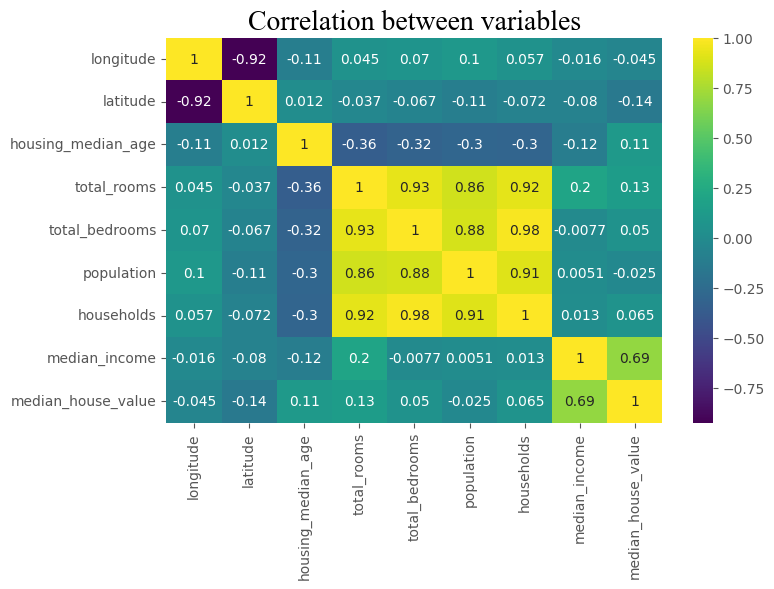

In [110]:
#Looking for correlation between variables.
plt.figure(figsize=(8,5))
sns.heatmap(rawdatacleaned.select_dtypes('float64').corr(),annot=True,cmap='viridis')
plt.title('Correlation between variables',fontsize=20,color="black",family="Times New Roman")
plt.show()

A few conclusion derived from the results above:
1. There are strong positive correlations between total rooms, total bedrooms, population, and number of households. This result is not surprising and feels natural because these variables are inherently related. Areas with more households typically have more people, which in turn leads to more total rooms and bedrooms.
2. The higher the median income of the block, the higher the median house value.  

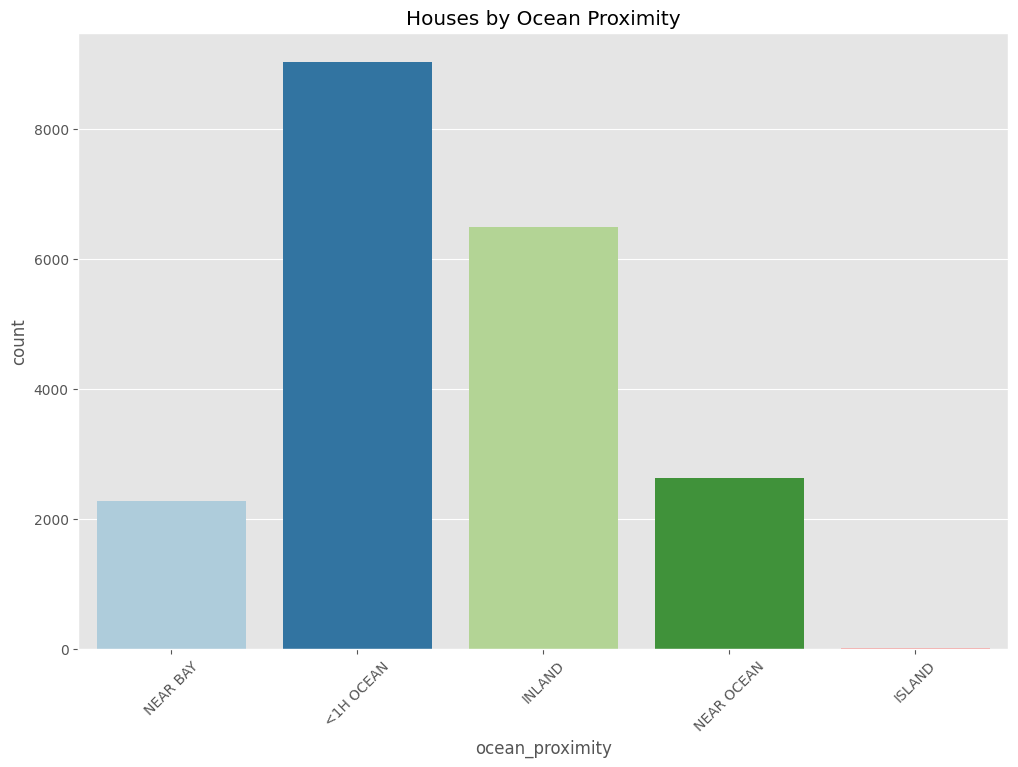

In [102]:
sns.countplot(x='ocean_proximity', data=rawdatacleaned, hue='ocean_proximity',palette="Paired")
plt.title("Houses by Ocean Proximity")
plt.xticks(rotation=45)
plt.show()

In [119]:
#Checking whether proximity to the ocean has correlation with median house value

#Adding another column that translates ocean proximity into float object. The smaller the number, the closer it is to the ocean.
proximity_order = {
    "ISLAND": 1,
    "NEAR OCEAN": 2,
    "<1H OCEAN": 3,
    "NEAR BAY": 4,
    "INLAND": 5
}

rawdatacleaned.loc[:,'ocean_distance_code'] = rawdatacleaned['ocean_proximity'].map(proximity_order)
rawdatacleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_distance_code
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


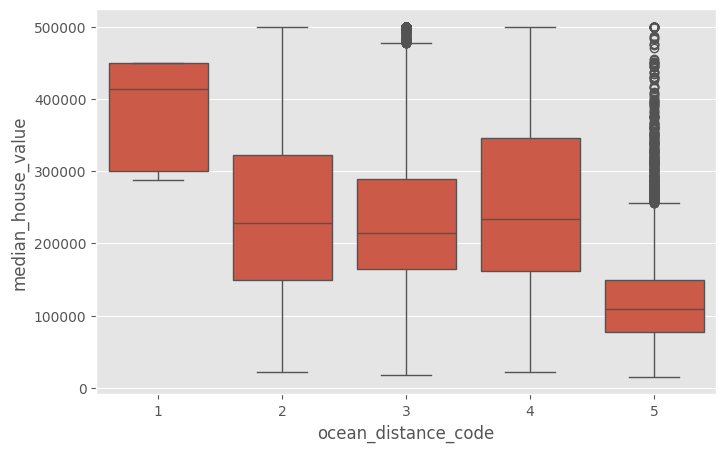

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(data=rawdatacleaned,x='ocean_distance_code',y='median_house_value')
plt.show()

The illustration above demonstrates that housing blocks situated on the island exhibit a markedly higher value range compared to all other locations. In contrast, the price distributions for housing blocks classified as “near the ocean,” “<1h ocean,” and “near bay” show a higher value range from housing blocks classified as "inland". This indicates that proximity to the ocean have a certain influence on housing value

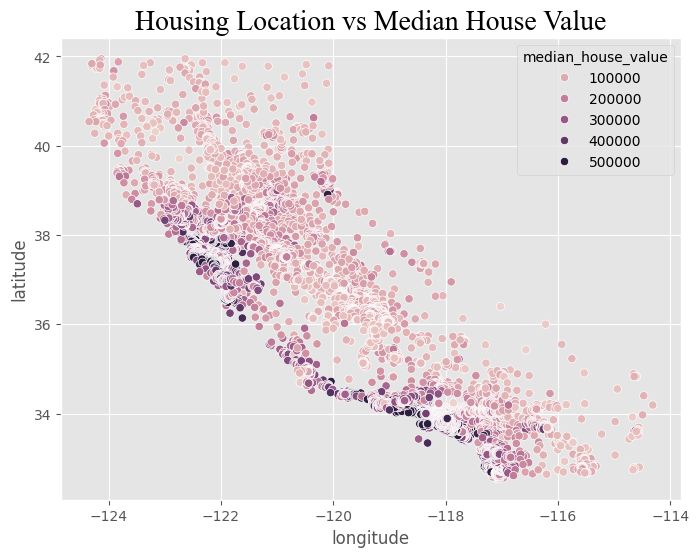

In [128]:
#Checking whether the hypothesis that housing blocks further north and further west has higher housing value

plt.figure(figsize=(8,6))
sns.scatterplot(data=rawdatacleaned,x='longitude',y='latitude',hue='median_house_value')
plt.title ("Housing Location vs Median House Value",fontsize=20,color="black",family="Times New Roman")
plt.show()

The illustration shows that moving further north does not correspond to higher housing values. However, housing located further west tends to be more valuable, likely because this area is closer to the ocean.